# Exploratory Data Analysis - read dataframes

In [27]:
# imports

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

%matplotlib inline

In [28]:
# read the CSV files

df = pd.read_csv('../clean_data/cases_with_mask_use.csv')


## mask.csv basic inspection

In [29]:
# check the size of dataframes  
df.shape

(18124, 12)

In [30]:
# check how many null values are in each

df.isnull().sum()


county                 0
totalcountconfirmed    0
totalcountdeaths       0
newcountconfirmed      0
newcountdeaths         0
date                   0
NEVER                  0
RARELY                 0
SOMETIMES              0
FREQUENTLY             0
ALWAYS                 0
population             0
dtype: int64

In [31]:
# check whether all the columns are in the dtype we want

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18124 entries, 0 to 18123
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   county               18124 non-null  object 
 1   totalcountconfirmed  18124 non-null  float64
 2   totalcountdeaths     18124 non-null  float64
 3   newcountconfirmed    18124 non-null  int64  
 4   newcountdeaths       18124 non-null  int64  
 5   date                 18124 non-null  object 
 6   NEVER                18124 non-null  float64
 7   RARELY               18124 non-null  float64
 8   SOMETIMES            18124 non-null  float64
 9   FREQUENTLY           18124 non-null  float64
 10  ALWAYS               18124 non-null  float64
 11  population           18124 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1.7+ MB


In [32]:
# check how many counties we have

df.nunique()

county                   58
totalcountconfirmed    8392
totalcountdeaths       1341
newcountconfirmed      1392
newcountdeaths          128
date                    313
NEVER                    37
RARELY                   38
SOMETIMES                46
FREQUENTLY               45
ALWAYS                   54
population               58
dtype: int64

In [33]:
df.describe()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
count,1.812400e+04,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,1.812400e+04
mean,1.327444e+04,210.774443,173.013187,2.048003,0.032279,0.030699,0.063650,0.158545,0.714792,6.823606e+05
std,5.201773e+04,852.430551,814.985729,11.017366,0.028533,0.026178,0.033898,0.040410,0.092762,1.456208e+06
min,0.000000e+00,0.000000,-1157.000000,-16.000000,0.001000,0.000000,0.004000,0.058000,0.482000,1.129000e+03
25%,9.400000e+01,1.000000,1.000000,0.000000,0.015000,0.013000,0.040000,0.134000,0.661000,4.590500e+04
50%,1.044000e+03,15.000000,14.000000,0.000000,0.023000,0.023000,0.058000,0.156000,0.737000,1.928430e+05
75%,8.147250e+03,114.000000,85.000000,0.000000,0.043000,0.043000,0.084000,0.186000,0.786000,7.621480e+05
max,1.048757e+06,15260.000000,28549.000000,318.000000,0.140000,0.135000,0.162000,0.276000,0.889000,1.003911e+07


In [34]:
df.columns

Index(['county', 'totalcountconfirmed', 'totalcountdeaths',
       'newcountconfirmed', 'newcountdeaths', 'date', 'NEVER', 'RARELY',
       'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'population'],
      dtype='object')

In [35]:
# fix dtype of date

df['date'] = pd.to_datetime(df['date'])


In [36]:
# sort the dataframe by name of counties & date
# check the top 5 lines 
df = df.sort_values(['county', 'date'])
df.head().tail()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
10612,Alameda,29.0,0.0,29,0,2020-03-18,0.019,0.008,0.055,0.123,0.795,1671329
10613,Alameda,36.0,0.0,7,0,2020-03-19,0.019,0.008,0.055,0.123,0.795,1671329
10614,Alameda,42.0,0.0,6,0,2020-03-20,0.019,0.008,0.055,0.123,0.795,1671329
10615,Alameda,62.0,0.0,20,0,2020-03-21,0.019,0.008,0.055,0.123,0.795,1671329
10616,Alameda,72.0,1.0,10,1,2020-03-22,0.019,0.008,0.055,0.123,0.795,1671329


In [37]:

# make new columns normalized to population
# popular metrics used lists numbers per 100K population, so follow the same method

df['confirmedper100k'] = df['totalcountconfirmed']/df['population']*100000
df['newlyconfirmedper100k'] = df['newcountconfirmed']/df['population']*100000
df['deathper100k'] = df['totalcountdeaths']/df['population']*100000
df['newdeath100k'] = df['newcountdeaths']/df['population']*100000


df.index

Int64Index([10612, 10613, 10614, 10615, 10616, 10617, 10618, 10619, 10620,
            10621,
            ...
             3119,  3120,  3121,  3122,  3123,  3124,  3125,  3126,  3127,
             3128],
           dtype='int64', length=18124)

In [38]:
# daily cases fluctuate a lot
# added 7-day rolling average columns to smooth out the variations 

df_bycounty = pd.DataFrame(df.groupby('county', sort=False)['newlyconfirmedper100k'].rolling(7).mean())
df_bycounty.set_index(keys=df.index, inplace=True)
df_bycounty.tail(30)
df_bycounty.columns = ['7dayrollingavg_newlyconfirmed']

merged = pd.merge(df, df_bycounty, left_index=True, right_index=True)



In [39]:
# repeat for daily deaths count
# pd. merge used to avoid conflict with groupby().rolling function 


df_bycounty2 = pd.DataFrame(df.groupby('county', sort=False)['newdeath100k'].rolling(7).mean())
df_bycounty2.set_index(keys=df.index, inplace=True)

df_bycounty2.columns = ['7dayrollingavg_newdeath']

merged2 = pd.merge(merged, df_bycounty2, left_index=True, right_index=True)


df = merged2.copy()
df.tail(30)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
3099,Yuba,3599.0,17.0,50,0,2020-12-26,0.057,0.035,0.071,0.167,0.669,78668,4574.922459,63.558245,21.609803,0.000000,78.267439,0.363190
3100,Yuba,3665.0,17.0,66,0,2020-12-27,0.057,0.035,0.071,0.167,0.669,78668,4658.819342,83.896883,21.609803,0.000000,74.635539,0.363190
3101,Yuba,3679.0,17.0,14,0,2020-12-28,0.057,0.035,0.071,0.167,0.669,78668,4676.615651,17.796309,21.609803,0.000000,63.558245,0.363190
3102,Yuba,3723.0,18.0,44,1,2020-12-29,0.057,0.035,0.071,0.167,0.669,78668,4732.546906,55.931255,22.880968,1.271165,62.468675,0.544785
3103,Yuba,3756.0,18.0,33,0,2020-12-30,0.057,0.035,0.071,0.167,0.669,78668,4774.495348,41.948442,22.880968,0.000000,57.747205,0.363190
3104,Yuba,3799.0,19.0,43,1,2020-12-31,0.057,0.035,0.071,0.167,0.669,78668,4829.155438,54.660091,24.152133,1.271165,57.384015,0.363190
3105,Yuba,3845.0,19.0,46,0,2021-01-01,0.057,0.035,0.071,0.167,0.669,78668,4887.629023,58.473585,24.152133,0.000000,53.752116,0.363190
3106,Yuba,3930.0,19.0,85,0,2021-01-02,0.057,0.035,0.071,0.167,0.669,78668,4995.678039,108.049016,24.152133,0.000000,60.107940,0.363190
3107,Yuba,3966.0,19.0,36,0,2021-01-03,0.057,0.035,0.071,0.167,0.669,78668,5041.439976,45.761936,24.152133,0.000000,54.660091,0.363190
3108,Yuba,4023.0,21.0,57,2,2021-01-04,0.057,0.035,0.071,0.167,0.669,78668,5113.896375,72.456399,26.694463,2.542330,62.468675,0.726380


In [40]:
# last 4 columns have null values 
# because rolling window = 7, thus first 6 days for each county lists null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18124 entries, 10612 to 3128
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   county                         18124 non-null  object        
 1   totalcountconfirmed            18124 non-null  float64       
 2   totalcountdeaths               18124 non-null  float64       
 3   newcountconfirmed              18124 non-null  int64         
 4   newcountdeaths                 18124 non-null  int64         
 5   date                           18124 non-null  datetime64[ns]
 6   NEVER                          18124 non-null  float64       
 7   RARELY                         18124 non-null  float64       
 8   SOMETIMES                      18124 non-null  float64       
 9   FREQUENTLY                     18124 non-null  float64       
 10  ALWAYS                         18124 non-null  float64       
 11  population  

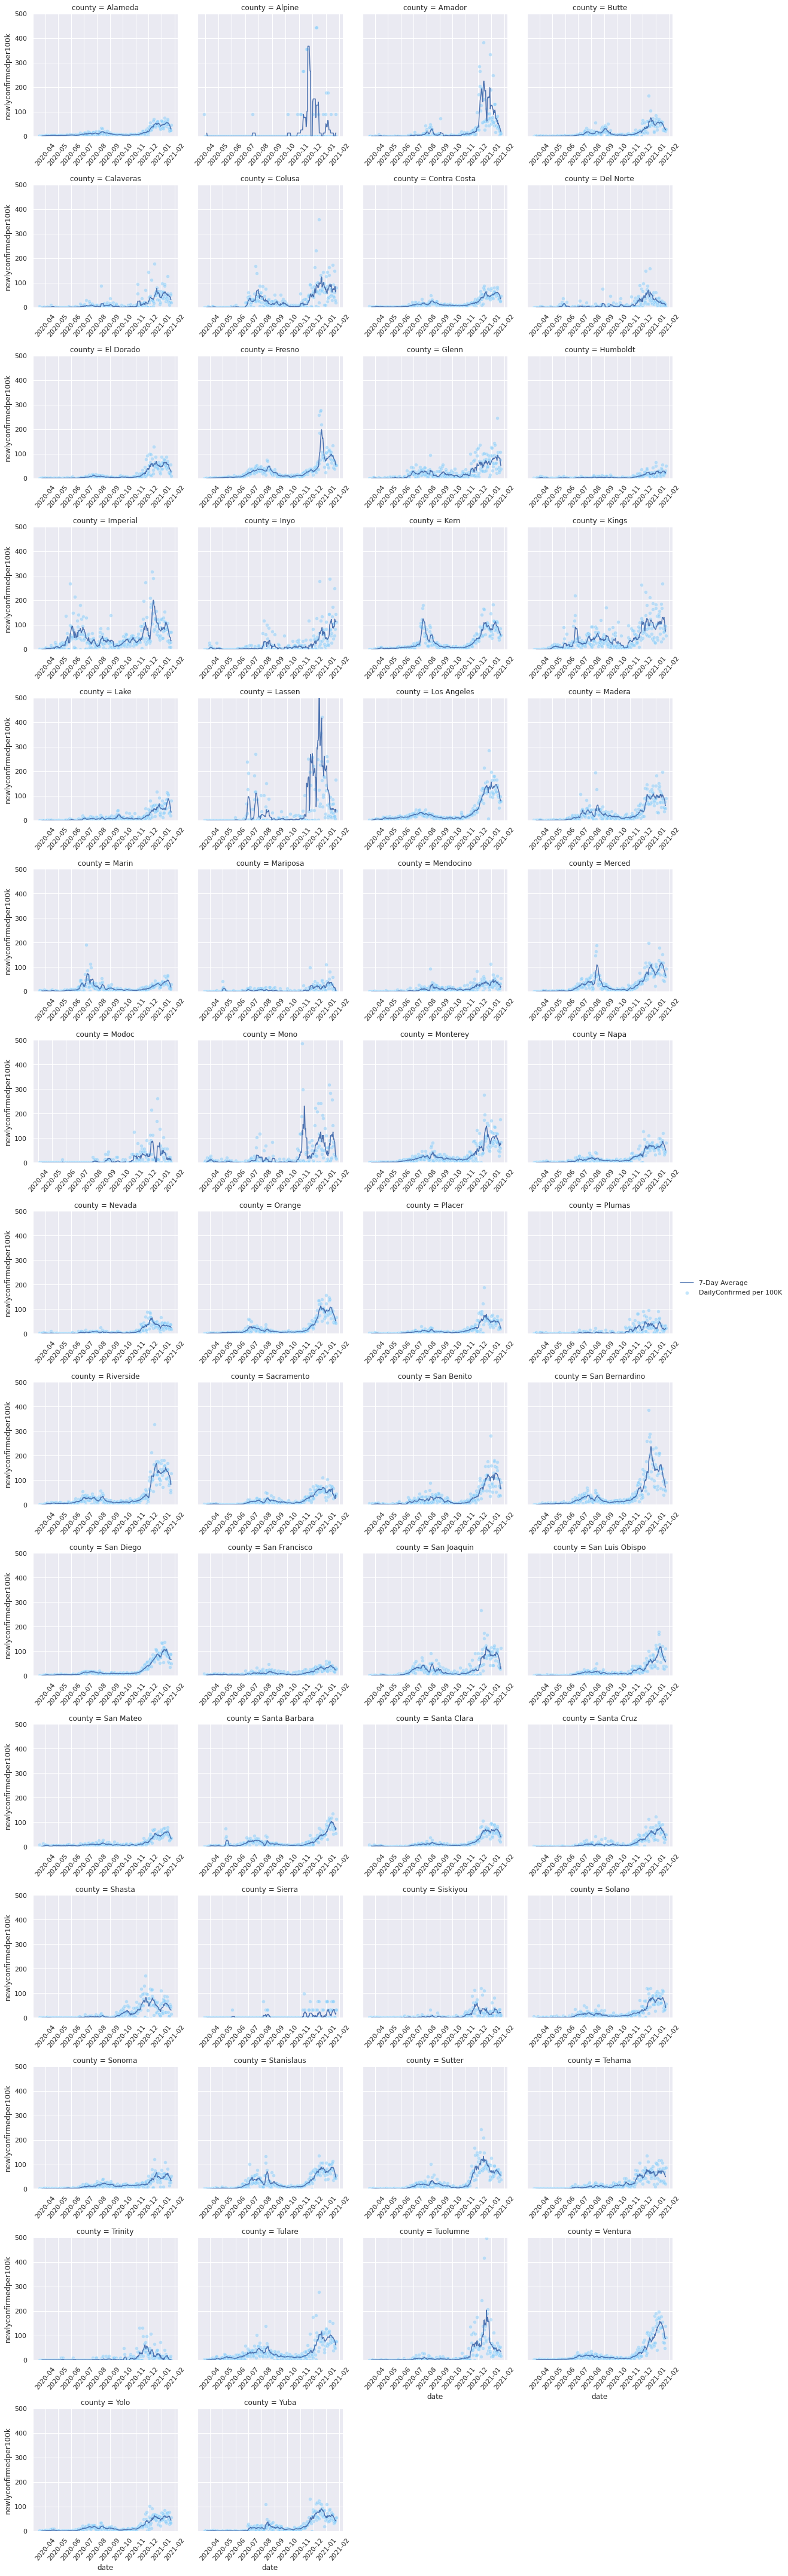

In [41]:
# graph the daily confirmed normalized by 100k population 
# light blue dots = normalized daily count
# dark blue line = 7-day rolling average


sns.set_theme(style="darkgrid")

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,500))
g.map(sns.lineplot, "date", '7dayrollingavg_newlyconfirmed', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newlyconfirmedper100k', alpha=.5, color='lightskyblue', label='DailyConfirmed per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()
g.add_legend()

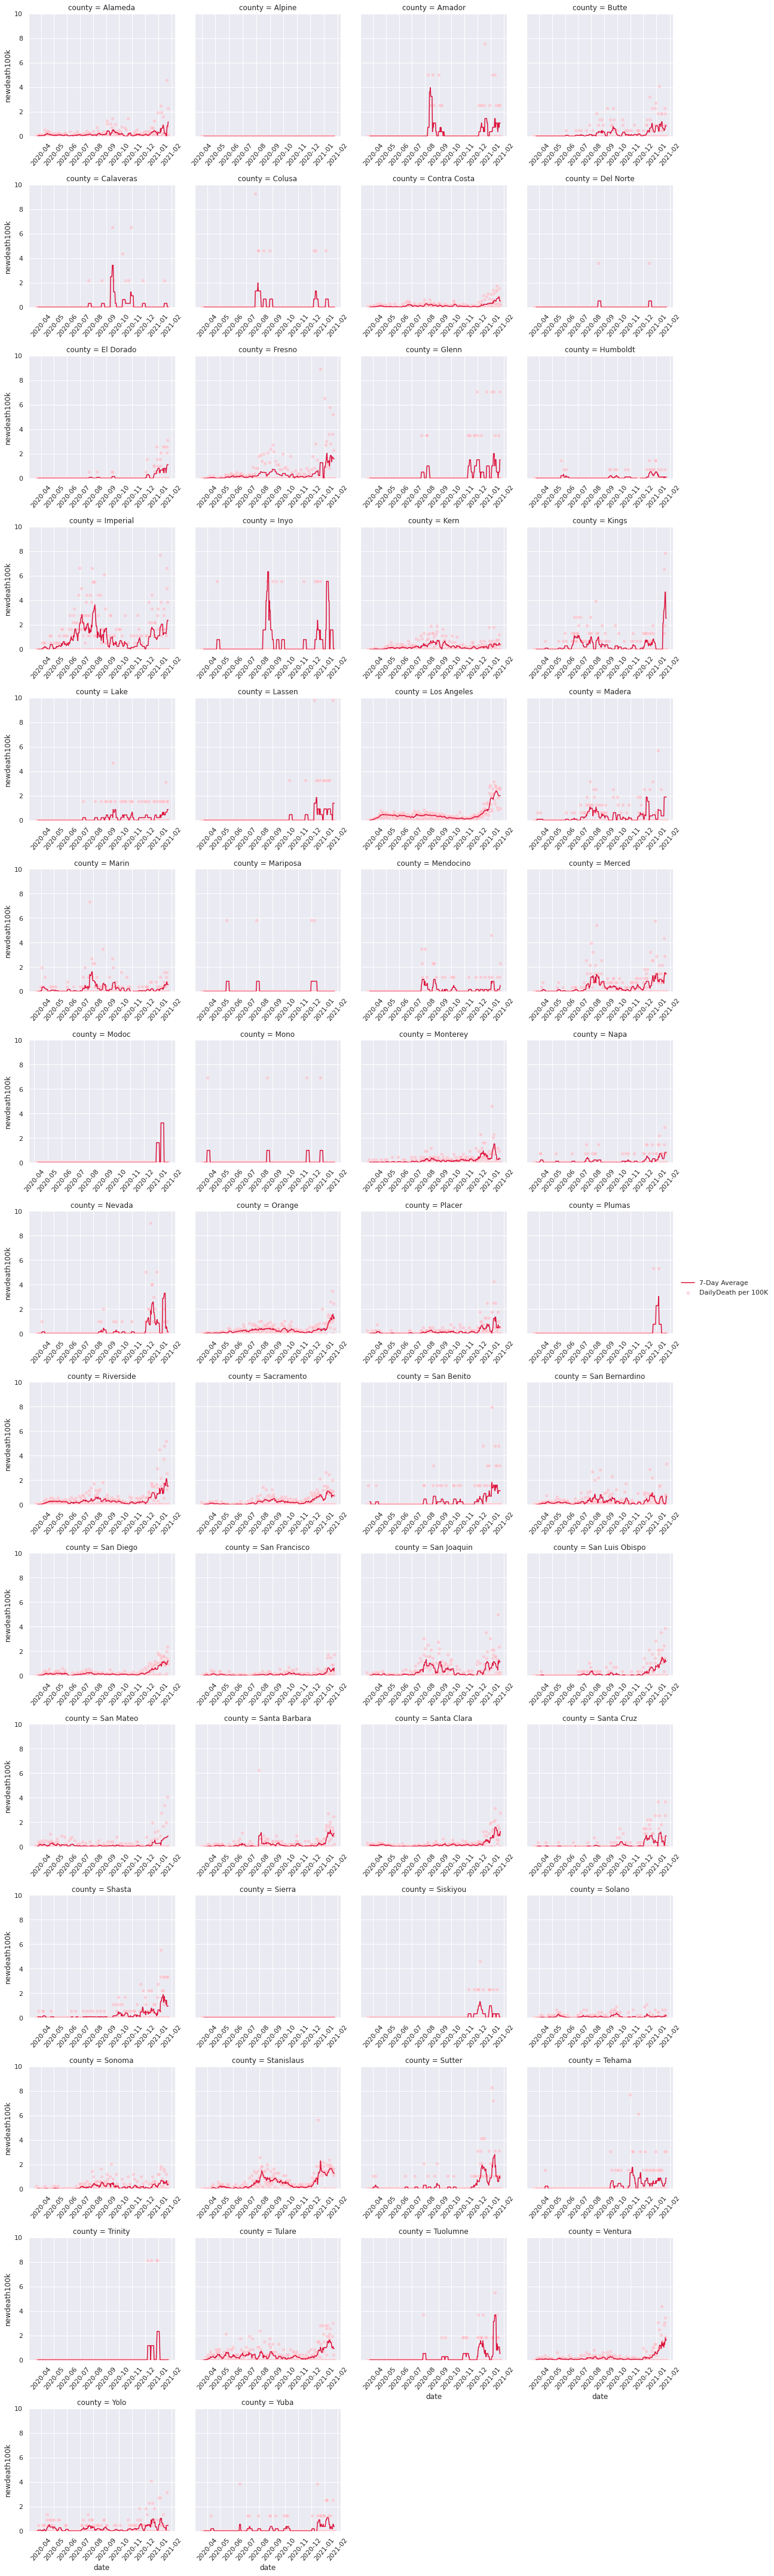

In [42]:
# graph the daily deaths normalized by 100k population 
# light pink dots = normalized daily deaths
# dark red line = 7-day rolling average

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,10))
g.map(sns.lineplot, "date", '7dayrollingavg_newdeath', color='crimson', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newdeath100k', alpha=.5, color='lightpink', label='DailyDeath per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()

g.add_legend()

- however, normalized graphs can exaggerate the fluctuations where the population is low
- ex) 1 confirmed out of 10 population = 10% increase
- in order to decide what constitutes as an "outbreak," let's look at the raw numbers before normalization 

In [43]:

# repeat the same process of generating a new column of rolling average
# but this time, use the raw numbers - NOT normalized per population



df_bycounty3 = pd.DataFrame(df.groupby('county', sort=False)['newcountconfirmed'].rolling(7).mean())
df_bycounty3.set_index(keys=df.index, inplace=True)
df_bycounty3.tail(30)
df_bycounty3.columns = ['7dayrollingavg_newlyconfirmed_rawnumber']

merged3 = pd.merge(df, df_bycounty3, left_index=True, right_index=True)

df_bycounty4 = pd.DataFrame(df.groupby('county', sort=False)['newcountdeaths'].rolling(7).mean())
df_bycounty4.set_index(keys=df.index, inplace=True)

df_bycounty4.columns = ['7dayrollingavg_newdeath_rawnumber']

merged4 = pd.merge(merged3, df_bycounty4, left_index=True, right_index=True)
df = merged4.copy()
df.tail(30)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,7dayrollingavg_newlyconfirmed_rawnumber,7dayrollingavg_newdeath_rawnumber
3099,Yuba,3599.0,17.0,50,0,2020-12-26,0.057,0.035,0.071,0.167,0.669,78668,4574.922459,63.558245,21.609803,0.000000,78.267439,0.363190,61.571429,0.285714
3100,Yuba,3665.0,17.0,66,0,2020-12-27,0.057,0.035,0.071,0.167,0.669,78668,4658.819342,83.896883,21.609803,0.000000,74.635539,0.363190,58.714286,0.285714
3101,Yuba,3679.0,17.0,14,0,2020-12-28,0.057,0.035,0.071,0.167,0.669,78668,4676.615651,17.796309,21.609803,0.000000,63.558245,0.363190,50.000000,0.285714
3102,Yuba,3723.0,18.0,44,1,2020-12-29,0.057,0.035,0.071,0.167,0.669,78668,4732.546906,55.931255,22.880968,1.271165,62.468675,0.544785,49.142857,0.428571
3103,Yuba,3756.0,18.0,33,0,2020-12-30,0.057,0.035,0.071,0.167,0.669,78668,4774.495348,41.948442,22.880968,0.000000,57.747205,0.363190,45.428571,0.285714
3104,Yuba,3799.0,19.0,43,1,2020-12-31,0.057,0.035,0.071,0.167,0.669,78668,4829.155438,54.660091,24.152133,1.271165,57.384015,0.363190,45.142857,0.285714
3105,Yuba,3845.0,19.0,46,0,2021-01-01,0.057,0.035,0.071,0.167,0.669,78668,4887.629023,58.473585,24.152133,0.000000,53.752116,0.363190,42.285714,0.285714
3106,Yuba,3930.0,19.0,85,0,2021-01-02,0.057,0.035,0.071,0.167,0.669,78668,4995.678039,108.049016,24.152133,0.000000,60.107940,0.363190,47.285714,0.285714
3107,Yuba,3966.0,19.0,36,0,2021-01-03,0.057,0.035,0.071,0.167,0.669,78668,5041.439976,45.761936,24.152133,0.000000,54.660091,0.363190,43.000000,0.285714
3108,Yuba,4023.0,21.0,57,2,2021-01-04,0.057,0.035,0.071,0.167,0.669,78668,5113.896375,72.456399,26.694463,2.542330,62.468675,0.726380,49.142857,0.571429


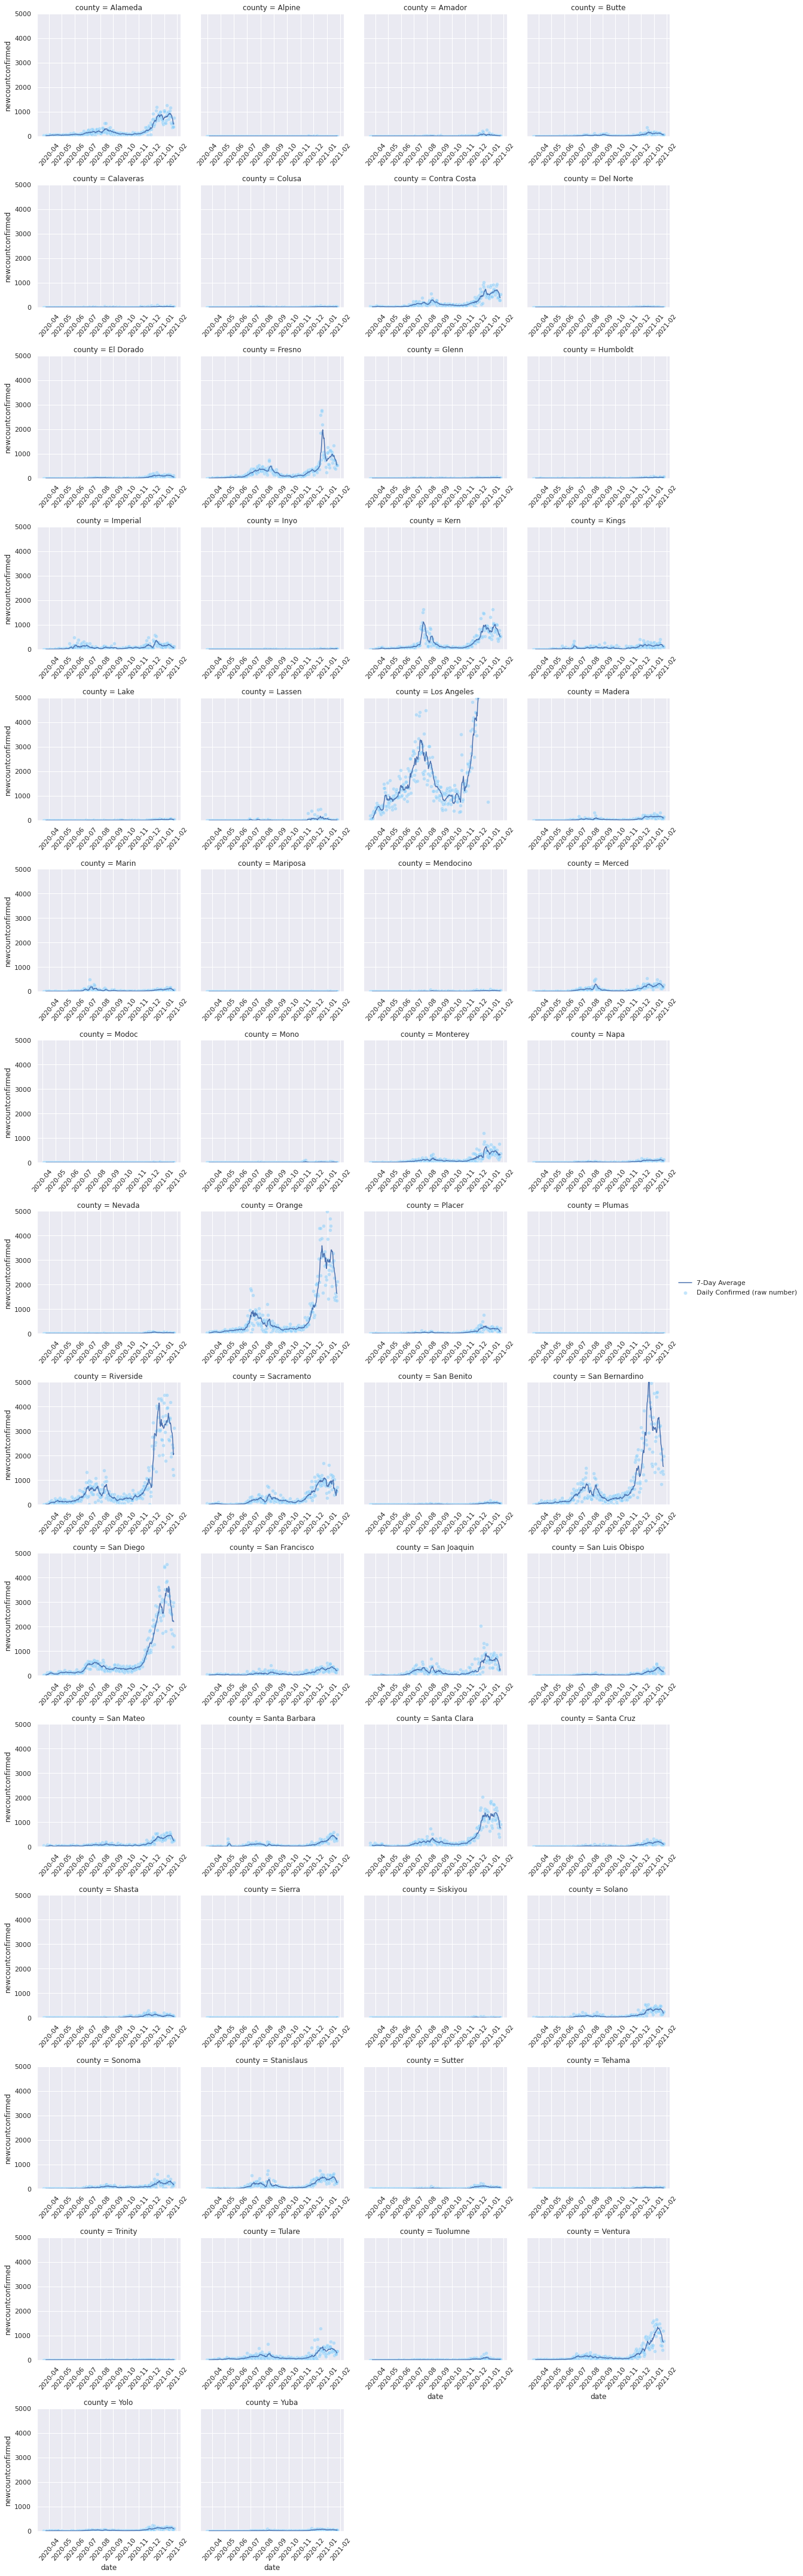

In [44]:
# graph the raw number of confirmed cases for each county
# on same y-axis scale to show the population differences among counties 


sns.set_theme(style="darkgrid")

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,5000))
g.map(sns.lineplot, "date", '7dayrollingavg_newlyconfirmed_rawnumber', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newcountconfirmed', alpha=.5, color='lightskyblue', label='Daily Confirmed (raw number)')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()
g.add_legend()

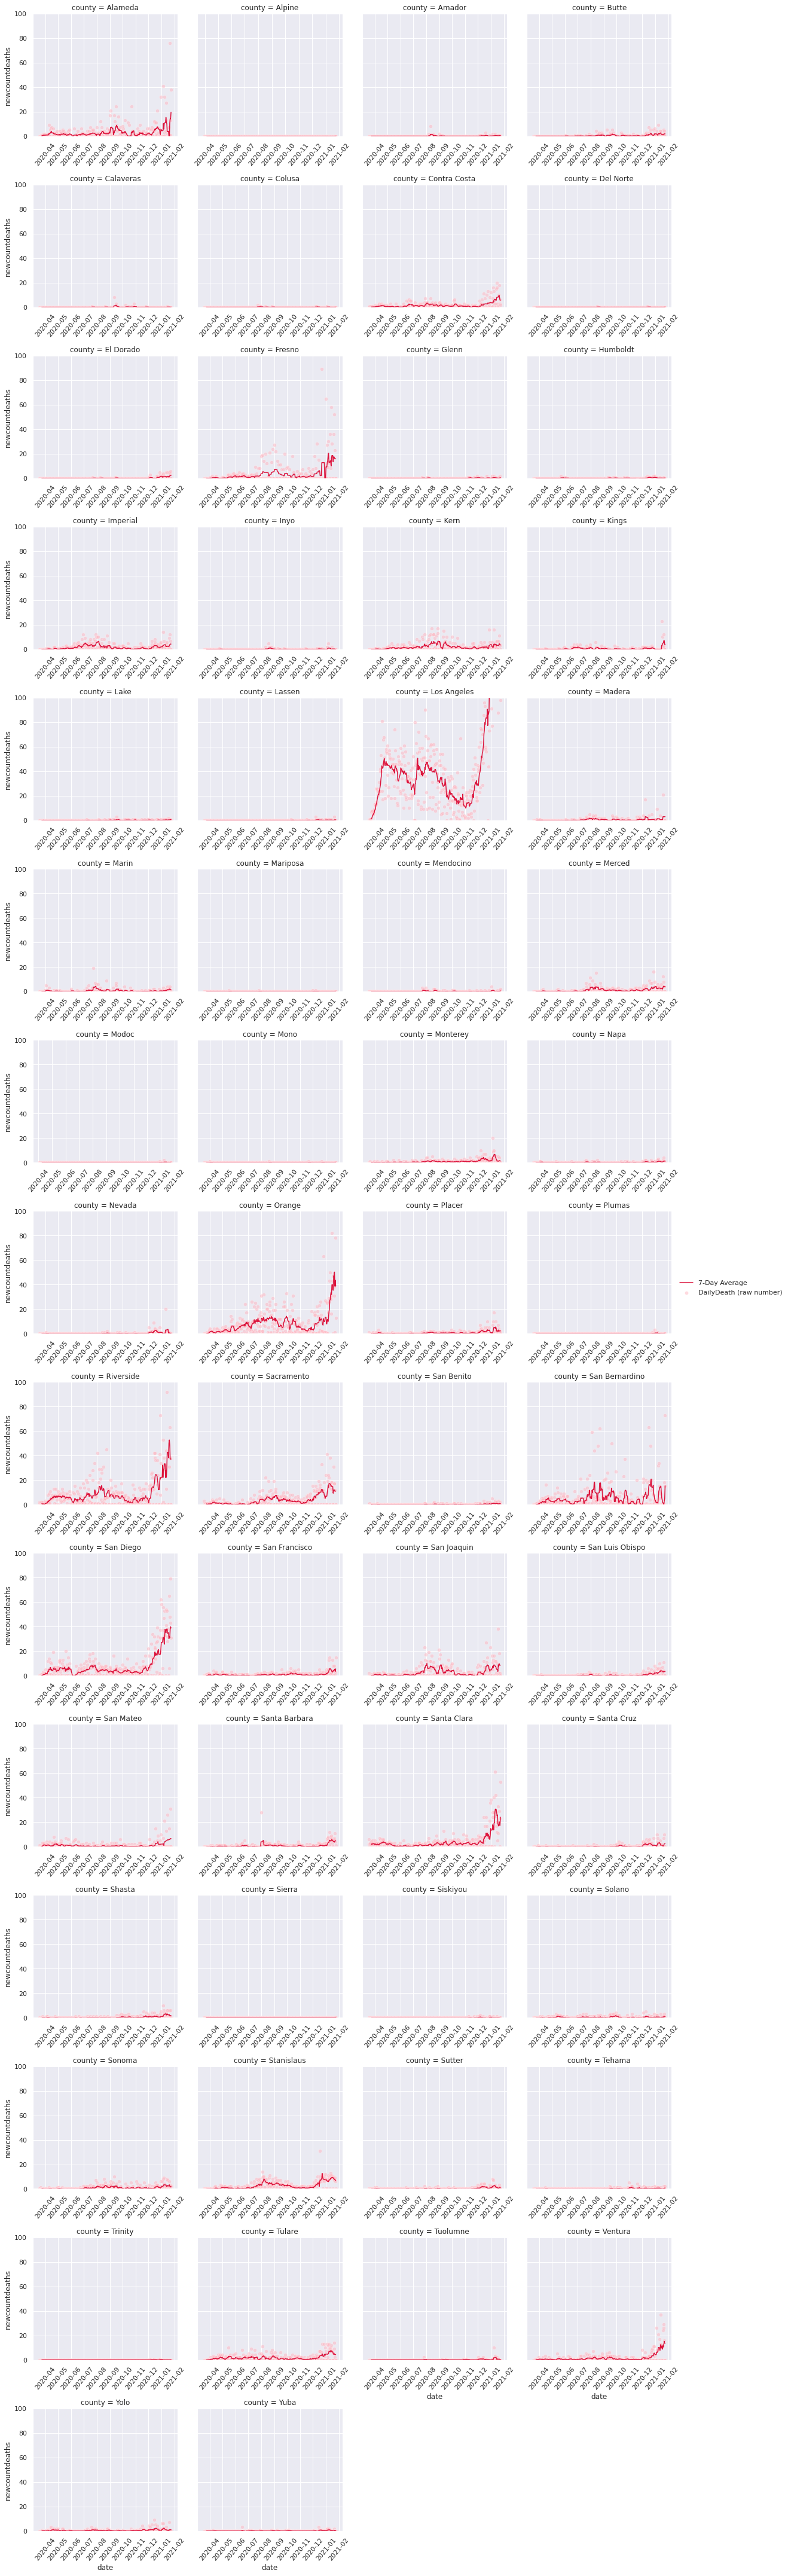

In [45]:
# graph the raw number of confirmed deaths for each county
# on same y-axis scale to show the population differences among counties 



g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,100))
g.map(sns.lineplot, "date", '7dayrollingavg_newdeath_rawnumber', color='crimson', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newcountdeaths', alpha=.5, color='lightpink', label='DailyDeath (raw number)')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()

g.add_legend()

In [46]:
df.corr()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,7dayrollingavg_newlyconfirmed_rawnumber,7dayrollingavg_newdeath_rawnumber
totalcountconfirmed,1.000000,0.952152,0.862535,0.786206,-0.082041,-0.124061,-0.087094,-0.121452,0.144905,0.671178,0.352683,0.217995,0.365960,0.125971,0.309678,0.244810,0.917632,0.879138
totalcountdeaths,0.952152,1.000000,0.775836,0.736563,-0.083868,-0.129131,-0.090945,-0.125952,0.150311,0.784920,0.270181,0.152382,0.346929,0.102521,0.213375,0.200493,0.818124,0.828843
newcountconfirmed,0.862535,0.775836,1.000000,0.746039,-0.067903,-0.102571,-0.077111,-0.100993,0.121949,0.559097,0.294758,0.297651,0.282553,0.120462,0.348735,0.220313,0.952499,0.791782
newcountdeaths,0.786206,0.736563,0.746039,1.000000,-0.062567,-0.094891,-0.068348,-0.089852,0.110170,0.569845,0.221587,0.158146,0.244035,0.258356,0.221230,0.261787,0.779790,0.884718
NEVER,-0.082041,-0.083868,-0.067903,-0.062567,1.000000,0.322358,0.208306,0.153044,-0.539913,-0.157277,-0.068782,-0.024998,-0.156342,-0.034377,-0.034474,-0.069058,-0.070950,-0.071072
RARELY,-0.124061,-0.129131,-0.102571,-0.094891,0.322358,1.000000,0.426194,0.379214,-0.701183,-0.219867,-0.104639,-0.042325,-0.225176,-0.058746,-0.057695,-0.117911,-0.107246,-0.107990
SOMETIMES,-0.087094,-0.090945,-0.077111,-0.068348,0.208306,0.426194,1.000000,0.570605,-0.796948,-0.173361,0.045675,0.042074,-0.107444,-0.010188,0.060485,-0.022365,-0.080499,-0.077418
FREQUENTLY,-0.121452,-0.125952,-0.100993,-0.089852,0.153044,0.379214,0.570605,1.000000,-0.796283,-0.198776,-0.095379,-0.030752,-0.190242,-0.036599,-0.041133,-0.075940,-0.105559,-0.102271
ALWAYS,0.144905,0.150311,0.121949,0.110170,-0.539913,-0.701183,-0.796948,-0.796283,1.000000,0.260565,0.075490,0.017632,0.233299,0.046747,0.022675,0.095612,0.127428,0.125208
population,0.671178,0.784920,0.559097,0.569845,-0.157277,-0.219867,-0.173361,-0.198776,0.260565,1.000000,0.090569,0.054067,0.184707,0.050257,0.074816,0.098740,0.584783,0.649439


In [47]:
df.to_csv('../clean_data/Cases_Normalized_per_100k.csv', index=False) 